# Decision Tree Classification - Titanic Dataset

This notebook explores **Decision Tree Classification** using the Titanic dataset. The goal is to predict survival of passengers based on features like age, class, gender, and fare.

Decision Trees are a supervised learning method useful for classification and regression tasks. They model data by splitting into branches based on feature values.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
import matplotlib.pyplot as plt
from google.colab import files

In [3]:
uploaded = files.upload()

Saving train.csv to train.csv


In [43]:
df = pd.read_csv('train.csv')
#house_cond

In [44]:
print("Dataset shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))
# Top ten columns with missing values

Dataset shape: (1460, 81)

Missing values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64


In [45]:
df = df.drop(['PoolQC',"MiscFeature","Alley","Fence","MasVnrType"],axis=1)
#droping the column with highest messing values

In [46]:
df.dropna()
#Now droping rows with missing values

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,60,RL,80.0,10000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,12,2007,WD,Normal,240000
1451,1452,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,New,Partial,287090
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000


In [47]:
df_encoded = pd.get_dummies(df)
# next we have converted categorical variables into numeric format

In [48]:
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']
#using Sale price coloum for pridecction

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
reg = DecisionTreeRegressor(random_state=42, max_depth=5)
reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [51]:
y_pred = reg.predict(X_test)
print("\nR^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
#Even though MSE looks large, my R² score shows that the model is doing a decent job.


R^2 Score: 0.7977095950399475
Mean Squared Error: 1551633394.6275873


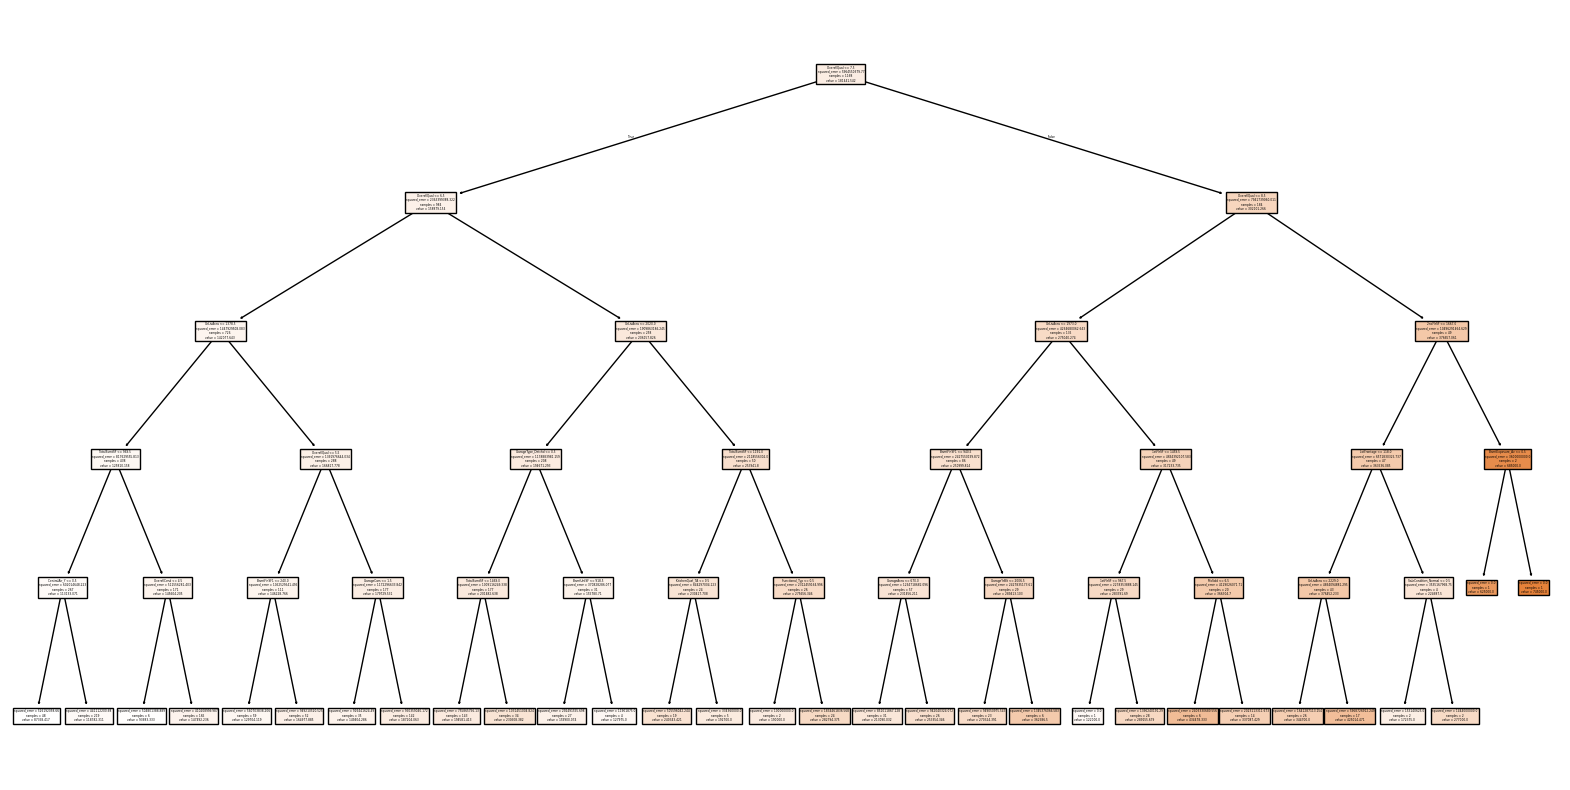

In [52]:
plt.figure(figsize=(20,10))
tree.plot_tree(reg, feature_names=X.columns, filled=True)#, max_depth=2)
plt.show()
#figure is too big that why i am useing the depth of 2

In [53]:
path = DecisionTreeRegressor(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities
#finding all the alpha value to purn

In [54]:
models = []
for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    models.append(model)
#the loop train one tree for every alpha value

In [55]:
train_scores = [r2_score(y_train, model.predict(X_train)) for model in models]
test_scores = [r2_score(y_test, model.predict(X_test)) for model in models]
#cal how well each model perfom on training and testing data set

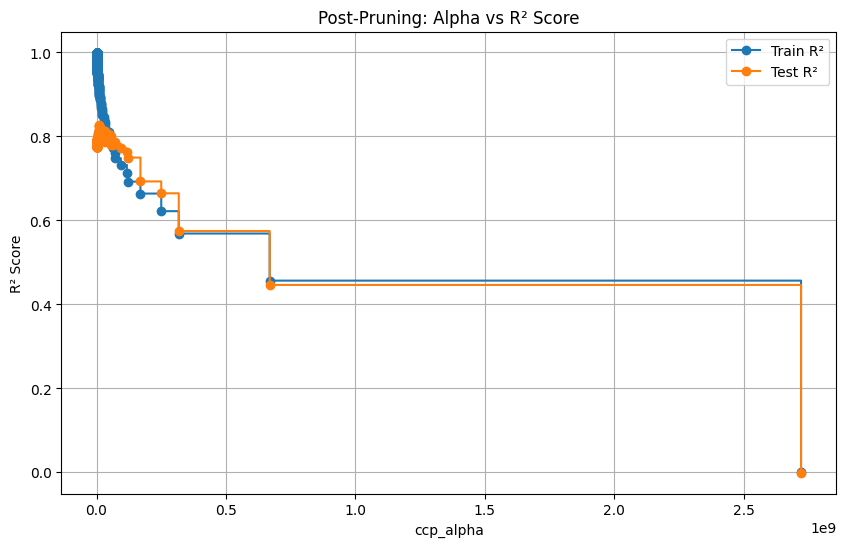

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train R²', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test R²', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("R² Score")
plt.title("Post-Pruning: Alpha vs R² Score")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Starts very high means the full tree fits training data very well.
#Drops as ccp_alpha increases caz the model becomes simpler and learns less from training data.
#how well model will performs on unseen data. high, fluctuates, and eventually drops.

In [57]:
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
final_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
final_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(10071658.239421643), random_state=42)

In [59]:
y_pred = final_model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: 0.8273458587477663
MSE: 1324313584.4263954


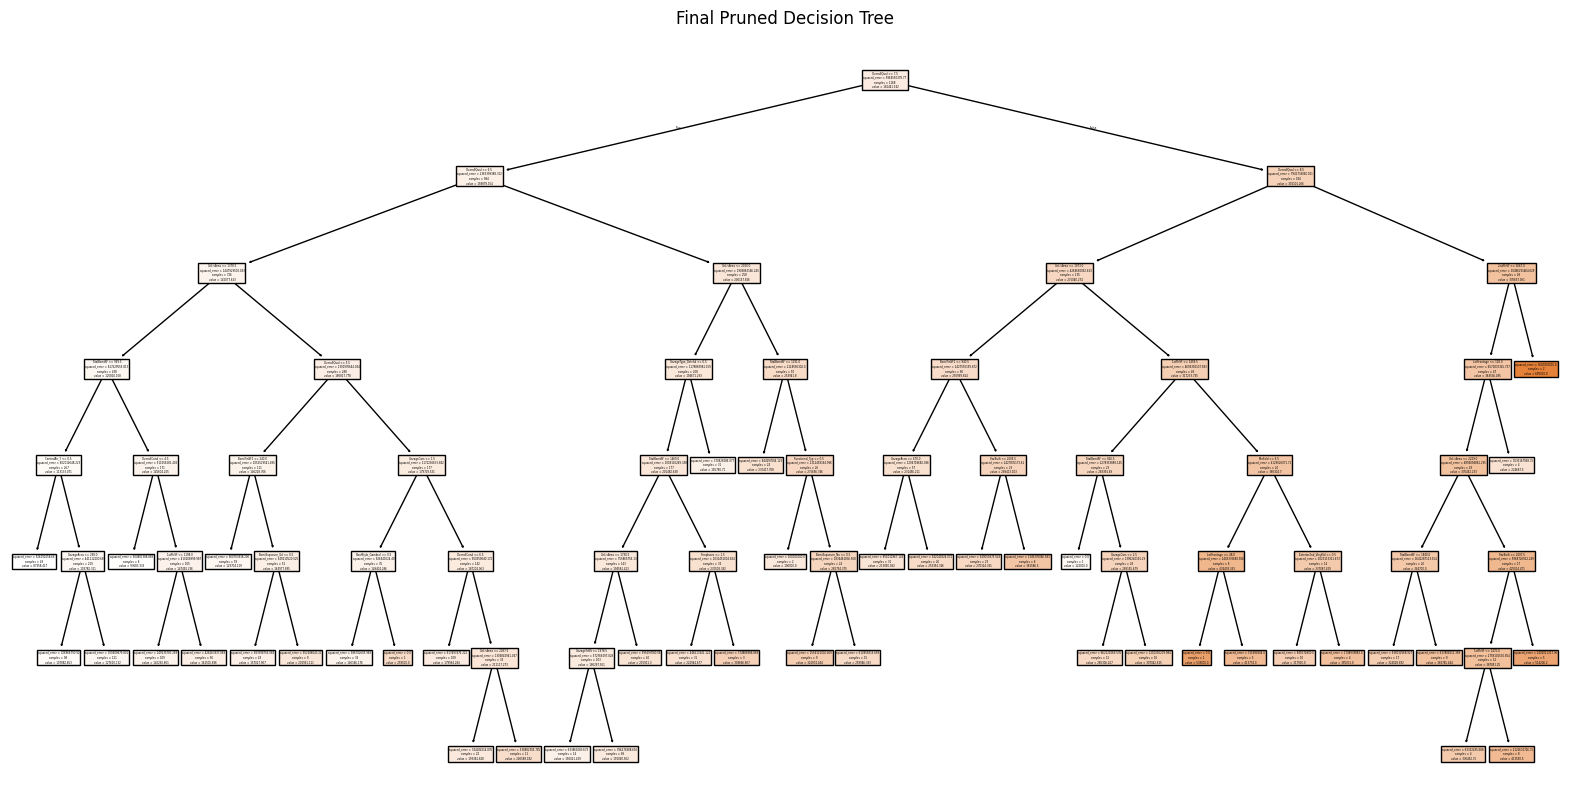

In [60]:
plt.figure(figsize=(20, 10))
plot_tree(final_model, filled=True, feature_names=X.columns)#, max_depth= 3)
plt.title("Final Pruned Decision Tree")
plt.show()

In [5]:
uploaded = files.upload()

Saving i.csv to i.csv


In [6]:
df = pd.read_csv("i.csv")

In [7]:
print(df.shape)
print("\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False).head(10))
# Top ten columns with missing values

(1338, 7)

Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [10]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [13]:
y_pred = dt.predict(X_test)
print("Initial R2 Score:", r2_score(y_test, y_pred))
print("Initial MSE:", mean_squared_error(y_test, y_pred))

Initial R2 Score: 0.7265877305258355
Initial MSE: 42446908.010150984


In [14]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print("CCP Alpha values:", ccp_alphas)

CCP Alpha values: [0.00000000e+00 1.44457706e-06 8.14812206e-06 8.14822520e-06
 8.14822650e-06 8.14823347e-06 3.25928782e-05 4.36979629e-05
 8.12565410e-05 9.83204155e-05 9.83204159e-05 1.30371596e-04
 1.30371603e-04 1.44456075e-04 1.58091926e-04 1.73828841e-04
 1.74791851e-04 2.03705656e-04 2.03705683e-04 2.34831396e-04
 3.03718900e-04 3.10614061e-04 4.42396661e-04 5.21486190e-04
 5.35300043e-04 5.35300054e-04 5.77824277e-04 5.77824298e-04
 5.89862306e-04 6.11116909e-04 6.60006262e-04 6.60006262e-04
 6.99167401e-04 7.80875354e-04 7.91421484e-04 8.14822549e-04
 8.84883743e-04 9.32223204e-04 1.07060008e-03 1.29384742e-03
 1.52581721e-03 1.57312666e-03 1.59202632e-03 1.59705219e-03
 1.73574080e-03 1.82641543e-03 1.83335091e-03 2.05280759e-03
 2.35032864e-03 2.79666961e-03 3.71830689e-03 3.75730251e-03
 3.94374099e-03 4.13115031e-03 4.36979623e-03 4.36979626e-03
 4.69337787e-03 4.69337787e-03 5.24384580e-03 5.28745347e-03
 5.30876081e-03 5.50820042e-03 5.77905557e-03 5.88271651e-03
 6.103

In [15]:
models = []
r2_scores = []

for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    models.append(model)
    r2_scores.append(r2_score(y_test, pred))

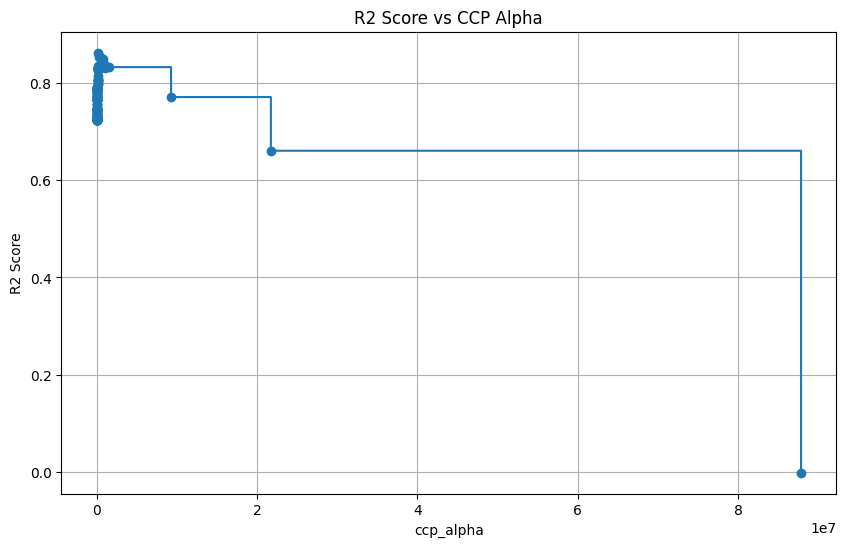

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, r2_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("R2 Score")
plt.title("R2 Score vs CCP Alpha")
plt.grid(True)
plt.show()

In [17]:
best_index = np.argmax(r2_scores)
best_alpha = ccp_alphas[best_index]
print(f"\nBest alpha: {best_alpha}, Best R2 Score: {r2_scores[best_index]}")



Best alpha: 244614.40401744086, Best R2 Score: 0.861908304652661


In [18]:
final_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
final_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(244614.40401744086), random_state=42)

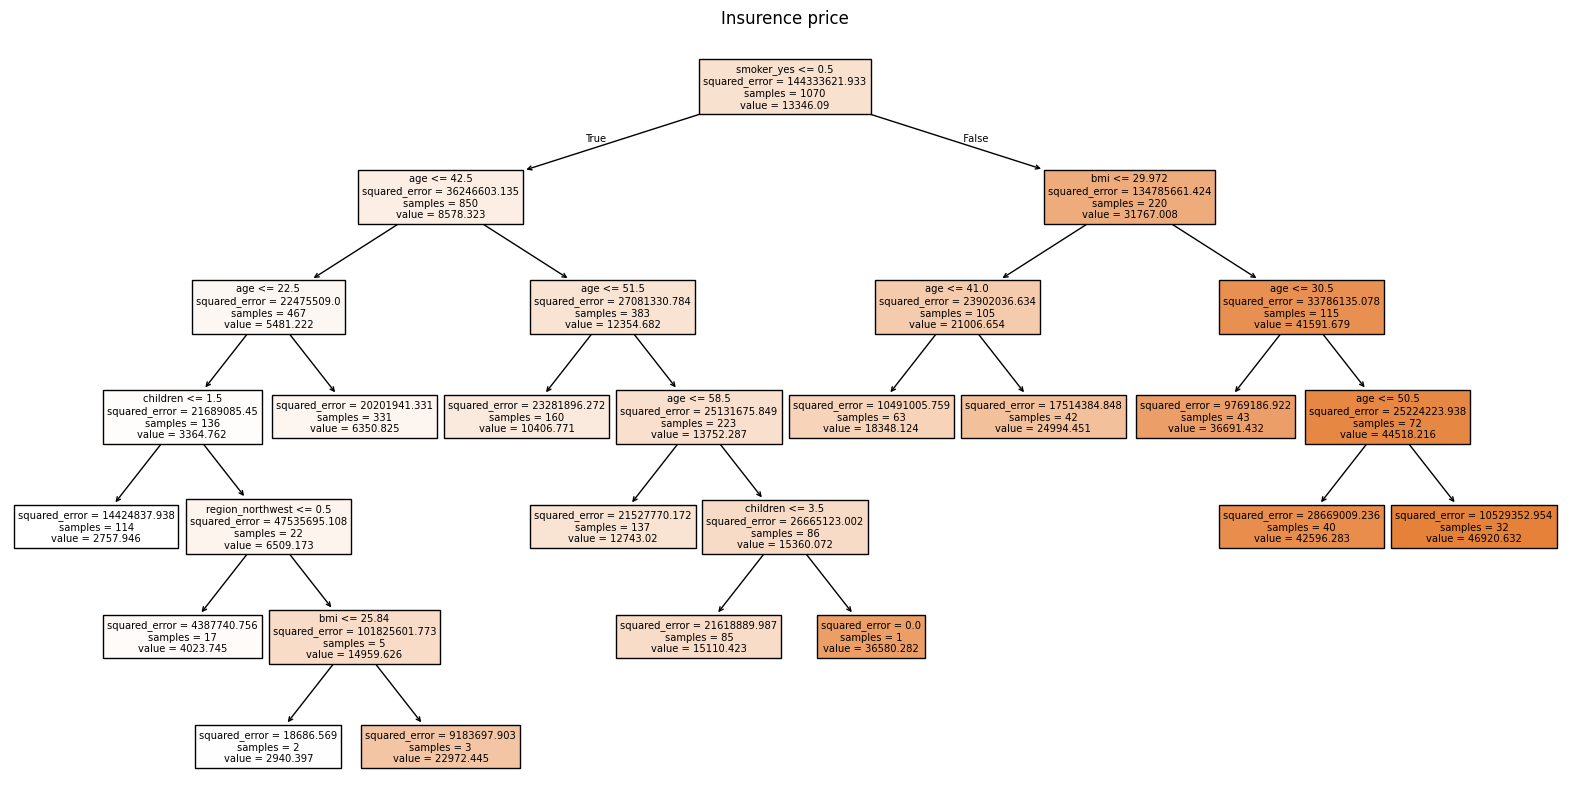

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(final_model, filled=True, feature_names=X.columns)#, max_depth= 3)
plt.title("Insurence price")
plt.show()


In [6]:
uploaded = files.upload()

Saving diabetes_dataset.csv to diabetes_dataset.csv


In [7]:
df = pd.read_csv("diabetes_dataset.csv")

In [10]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [11]:
print(df.shape)
print("/nMissing Values")
print(df.isnull().sum())

(768, 9)
/nMissing Values
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [15]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
y_pred = dt.predict(X_test)
print("Initial R2 Score:", r2_score(y_test, y_pred))
print("Initial MSE:", mean_squared_error(y_test, y_pred))

Initial R2 Score: -0.10303030303030325
Initial MSE: 0.2532467532467532


In [21]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print("CCP Alpha values:", ccp_alphas)


CCP Alpha values: [0.         0.000698   0.00072385 0.0007329  0.0007329  0.00076909
 0.00077362 0.00079897 0.00080777 0.00081433 0.00088836 0.0010109
 0.00107149 0.00108578 0.00108578 0.00108578 0.00108578 0.00114821
 0.00119929 0.0012215  0.0012215  0.00130293 0.00130293 0.00140509
 0.0014806  0.0014806  0.00148472 0.00148971 0.00152217 0.00153875
 0.00155555 0.00158076 0.00162607 0.00164742 0.00180863 0.00195595
 0.00212123 0.00212362 0.00216559 0.00225043 0.00264137 0.00347495
 0.00371351 0.00398689 0.00426126 0.00463526 0.00592194 0.00708517
 0.01155549 0.01229832 0.04024358]


In [22]:
models = []
r2_scores = []

for alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    models.append(model)
    r2_scores.append(r2_score(y_test, pred))

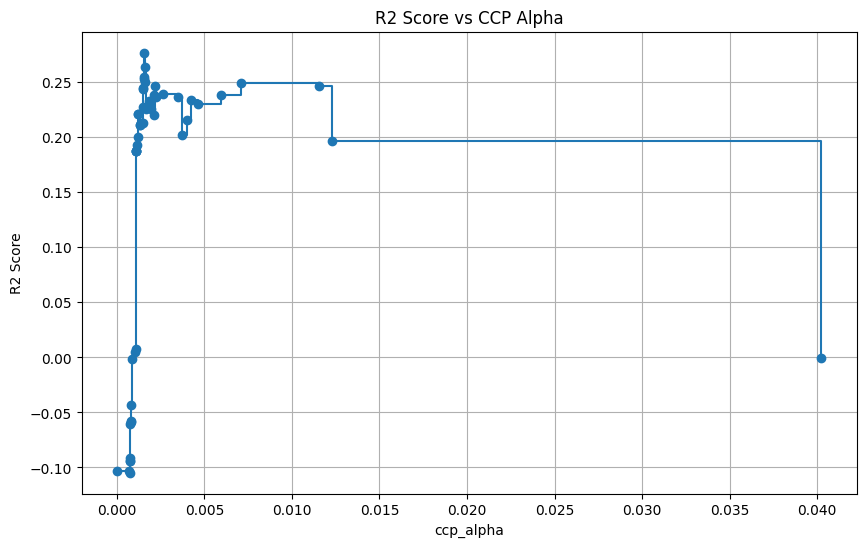

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, r2_scores, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("R2 Score")
plt.title("R2 Score vs CCP Alpha")
plt.grid(True)
plt.show()

In [24]:
best_index = np.argmax(r2_scores)
best_alpha = ccp_alphas[best_index]
print(f"\nBest alpha: {best_alpha}, Best R2 Score: {r2_scores[best_index]}")



Best alpha: 0.0015555537413929309, Best R2 Score: 0.2765191327032407


In [25]:
final_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
final_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=np.float64(0.0015555537413929309),
                      random_state=42)

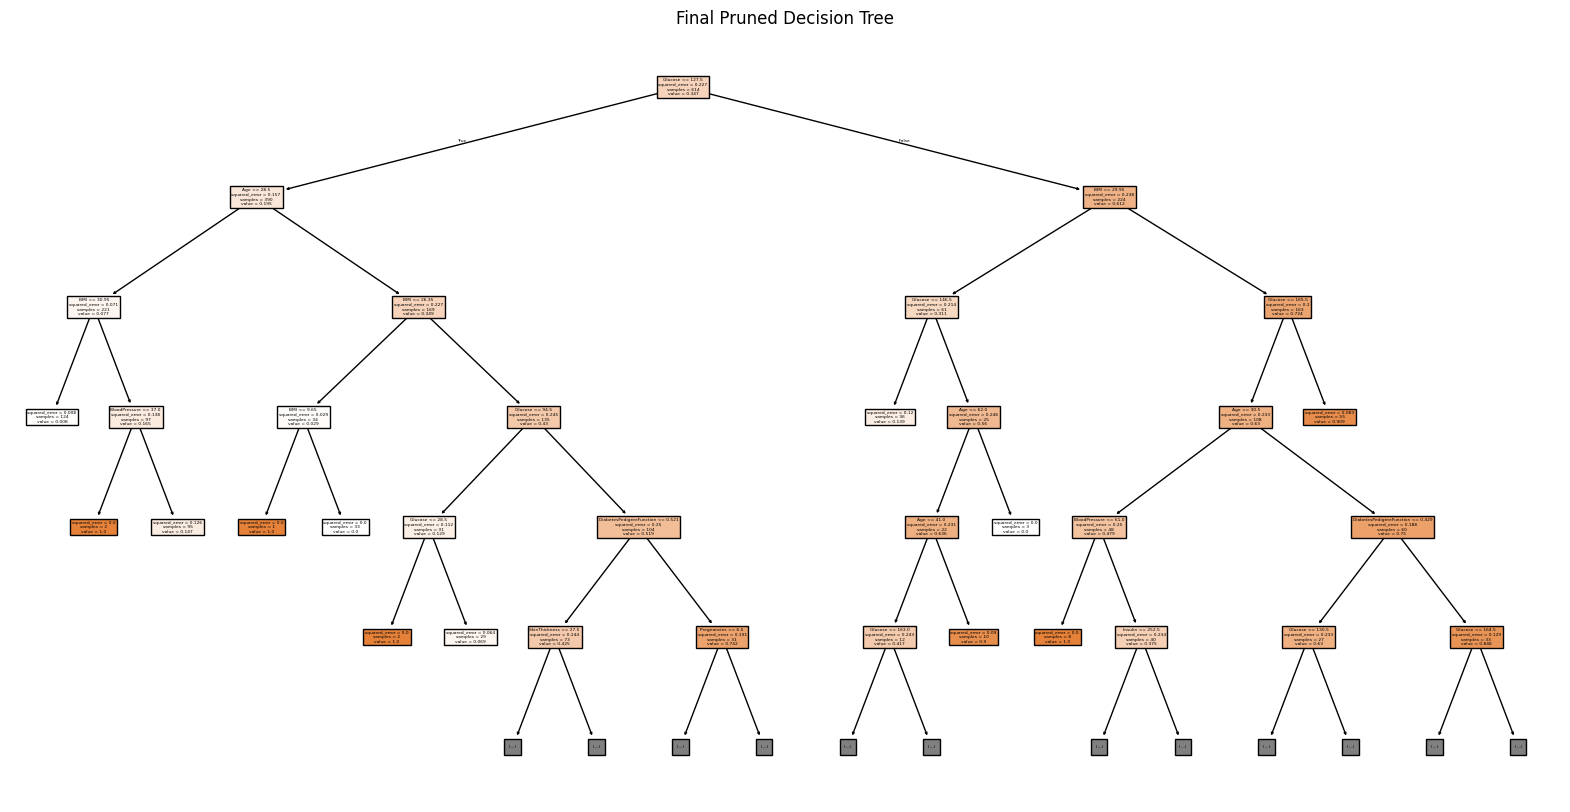

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(final_model, filled=True, feature_names=X.columns, max_depth= 5)
plt.title("Final Pruned Decision Tree")

plt.show()

## Conclusion

The Decision Tree model performed well on the Titanic dataset, clearly separating survival outcomes based on a hierarchy of passenger features. While easy to interpret, Decision Trees may overfit, which can be controlled using pruning or limiting depth.
